## 📐 Evaluation RQ2

Using **ARI (Adjusted Rand Index)** to measure the degree of overlap among the implemented approaches:

**1)** ARI Against the Ground-Truth.

**2)** Pairwise ARI Score.

#### Imports

In [1]:
# Imports
from   sklearn.metrics      import adjusted_rand_score
import matplotlib.pyplot    as plt
import seaborn              as sns
import pandas               as pd
import numpy                as np
import os

#### Parameters

In [2]:
# Input Path
INPUT_PATH = "../../0_Data/CSV/"

# Approaches
APPROACHES = ["1b_Chabada","1c_Ebrahimi","1e_Yang","2a_Gcata"]

In [3]:
# Path 
PLOTS_PATH = "./Plots/"

# Create folder for paths
if not os.path.exists(PLOTS_PATH):
    os.makedirs(PLOTS_PATH)
    print("Folder created:", PLOTS_PATH)
else:
    print("Folder already exists:", PLOTS_PATH)

Folder already exists: ./Plots/


### Load Data

In [4]:
appsDF = pd.read_csv(INPUT_PATH + "0_AndroCatSet.csv", index_col=False)
appsDF = appsDF.drop(['pkgName','googlePlayDescription'], axis=1)

# Add all the other approaches
for i in range(0,3):
    inputDF = pd.read_csv(INPUT_PATH + "RQ1/" + APPROACHES[i] + "ClusteringLabels.csv", index_col=False)
    appsDF = pd.concat([appsDF, inputDF['clusterID']], axis=1)
    appsDF = appsDF.rename(columns={'clusterID': APPROACHES[i][3:]})

# Add all the other approaches
for i in range(3,len(APPROACHES)):
    inputDF = pd.read_csv(INPUT_PATH + "RQ2/" + APPROACHES[i] + "ClusteringLabels.csv", index_col=False)
    appsDF = pd.concat([appsDF, inputDF['clusterID']], axis=1)
    appsDF = appsDF.rename(columns={'clusterID': APPROACHES[i][3:]})

### **1)**  ARI Against the Ground-Truth

Compute ARI Score.

In [5]:
# To store ARI Score of each approach
ariScoreList = []

# Get approach List
approachesList = appsDF.columns[3:]

# For each approach compare against ground-truth
for approach in approachesList:
    #Compute the Adjusted Rand Index 
    ariScoreList.append(adjusted_rand_score(appsDF["classID"].values, appsDF[approach].values))

Plot ARI Score

In [6]:
# Plot Parameters
TITLE_FONTSIZE = 18
TICKS_FONTSIZE = 18
AXIS_FONTSIZE  = 20

COLORS = ["#68B984","#68B984","#68B984","#E96479"]

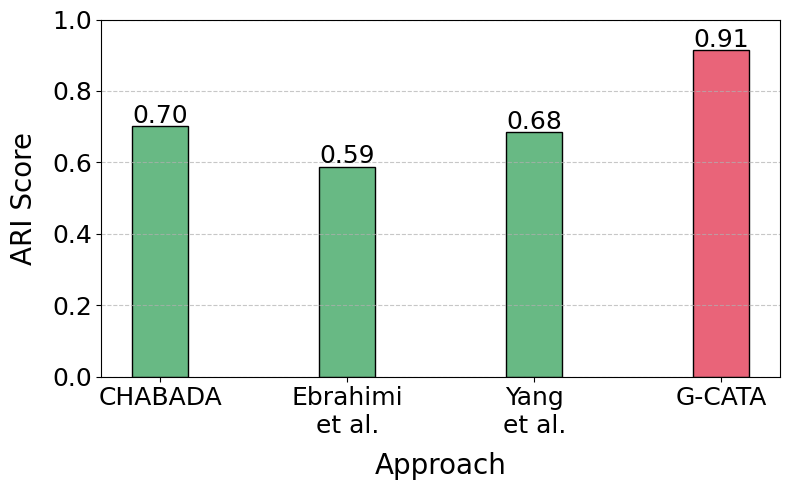

In [7]:
fig = plt.figure(figsize=(8,5))

plt.bar(approachesList, ariScoreList, edgecolor='black', color=COLORS, width=0.3)

# Labels and Ticks
plt.xlabel('Approach' , fontsize=AXIS_FONTSIZE,labelpad=10) 
plt.xticks(range(0,4), ['CHABADA','Ebrahimi\net al.', 'Yang\net al.', 'G-CATA'],fontsize=TICKS_FONTSIZE)

plt.ylabel('ARI Score', fontsize=AXIS_FONTSIZE,labelpad=10)  
plt.yticks(fontsize=TICKS_FONTSIZE)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# add value labels to the top of the bars
for i in range(len(ariScoreList)):
    plt.text(i, ariScoreList[i]+0.01, "{:.2f}".format(ariScoreList[i]), ha='center', fontsize=TICKS_FONTSIZE)

plt.ylim(0,1)
plt.tight_layout() 
plt.savefig(PLOTS_PATH + 'overviewRQ2.png')
plt.savefig(PLOTS_PATH + 'overviewRQ2.pdf')

plt.show()

### **2)** Pairwise ARI Score.

Compute ARI score pairwise.

In [8]:
# Get the approaches
approachesList = appsDF.columns[1:]

# Create a matrix for pairwise comparison
resultDF = pd.DataFrame(columns=approachesList,index=approachesList)

# Pairwise comparison
for i, (index, row) in enumerate(resultDF.iterrows()):
    for j in range(i,len(row)):
        #Compute the Adjusted Rand Index
        ariScore = adjusted_rand_score(appsDF[approachesList[i]].values, appsDF[approachesList[j]].values)
        
        # Store the results
        resultDF.loc[approachesList[i],approachesList[j]] = ariScore
        resultDF.loc[approachesList[j],approachesList[i]] = ariScore

resultDF = resultDF.astype(float)
resultDF

,classID,googlePlayCategoryID,Chabada,Ebrahimi,Yang,Gcata
classID,1.000000,0.328549,0.701068,0.587023,0.684371,0.913817
googlePlayCategoryID,0.328549,1.000000,0.268301,0.336914,0.293944,0.314171
Chabada,0.701068,0.268301,1.000000,0.509386,0.569986,0.665840
Ebrahimi,0.587023,0.336914,0.509386,1.000000,0.484198,0.557865
Yang,0.684371,0.293944,0.569986,0.484198,1.000000,0.660345
Gcata,0.913817,0.314171,0.665840,0.557865,0.660345,1.000000
